In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

# Краткое введение в deep learning

# Задача машинного обучения

Задано множество объектов $X$ множество допустимых ответов $Y$, и существует целевая функция (target function) $y: X → Y$ , значения которой $y_i = y(x_i)$ 
известны только на конечном подмножестве объектов ${{ x_1, . . . , x_ℓ }} ⊂ X$. 

Пары «объект–ответ» $(x_i, y_i)$ называются прецедентами. Совокупность пар $X^ℓ = (x_i, y_i)^ℓ_{i=1}$ называется обучающей выборкой (training sample)

Задача обучения по прецедентам заключается в том, чтобы по выборке $X^ℓ$ восстановить зависимость $y^∗$, то есть построить решающую функцию (decision function) $a: X → Y$ , которая приближала бы целевую функцию $y_∗(x)$, причём не только на объектах обучающей выборки, но и на всём множестве X.

# Линейные модели

Определим модель зависимости как $y_i= w_1 + w_2x_i + \varepsilon_i$


Согласно методу наименьших квадратов, искомый вектор параметров $\mathbf{w}=(w_1,w_2)^T$ есть решение нормального уравнения
$$\mathbf{w} = (A^TA)^{-1}A^T\mathbf{y}$$,
где $\mathbf{y}$ — вектор, состоящий из значений зависимой переменной, $\mathbf{y}=(y_1,\ldots, y_m)$. Столбцы матрицы $A$ есть подстановки значений свободной переменной $x_i^0\mapsto a_{i1}$ и $x_i^1\mapsto a_{i2}, i=1,\ldots, m$. 

# Линейные модели

Зависимая переменная восстанавливается по полученным весам и заданным значениям свободной переменной
$y^*_i = w_1+w_2x_i$

Для оценки качества модели используется критерий суммы квадратов регрессионных остатков, MSE — Mean of Squared Errors.
$$ MSE = \sum_{i=1}^m(y_i-y_i^*)^2 = (\mathbf{y}-\mathbf{y}^*)^T(\mathbf{y}-\mathbf{y}^*)$$

In [2]:
from sklearn import datasets, linear_model

diabetes = datasets.load_diabetes()
X = diabetes.data[:, [2]]
y = diabetes.target

Коеффициент:        949.4352603839491
MSE:                3890.4565854612724


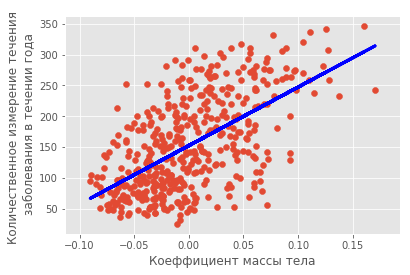

In [3]:
model = linear_model.LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f'{"Коеффициент: ":<20}{model.coef_[0]}')
print(f'{"MSE: ":<20}{np.mean((y_pred - y) ** 2)}')

plt.scatter(X, y)
plt.plot(X, y_pred, color='blue', linewidth=3)
plt.xlabel('Коеффициент массы тела')
plt.ylabel('Количественное измерение течения \n заболевания в течении года')
plt.show()

# Линейная модель в общем виде


О общем случае линейная модель может быть обощена как:

$$ y= f( \textbf{w}^T x + w_0) $$

где функиця $f(\bullet)$ (в общем случае, нелинейная) называется функцией активации

# Логистическая регрессия

Мы можем перейти от задачи регрессии к задаче классификации следующим образом: вместо предсказания бинарной переменной, мы предсказываем непрерывную переменную со значениями на отрезке [0,1] при любых значениях независимых переменных. Это достигается применением следующего регрессионного уравнения:

$$ P(x) = \frac{1}{1+\mbox e^{-y}} $$

# Логистическая функция ( сигмоид )

<img src="img/logistic-curve.svg"></img>

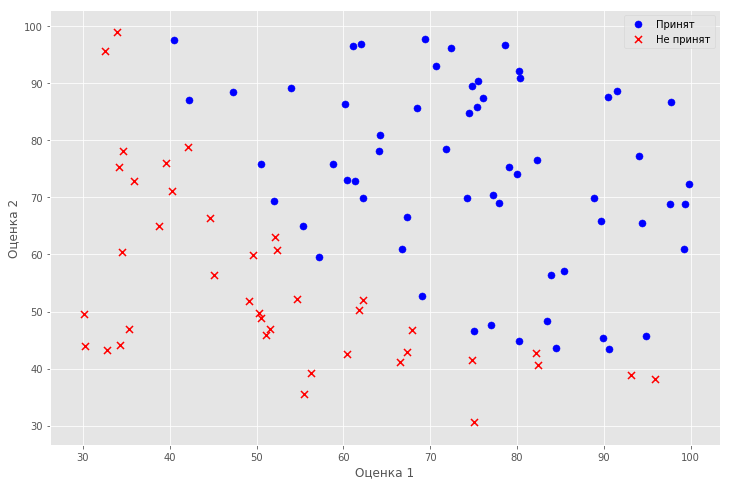

In [4]:
data = pd.read_csv('data/dataset1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Принят')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Не принят')
ax.legend()
ax.set_xlabel('Оценка 1')
ax.set_ylabel('Оценка 2')

Коеффициенты 0.186439852807 0.181443940353
Смещение (bias) -22.686363051


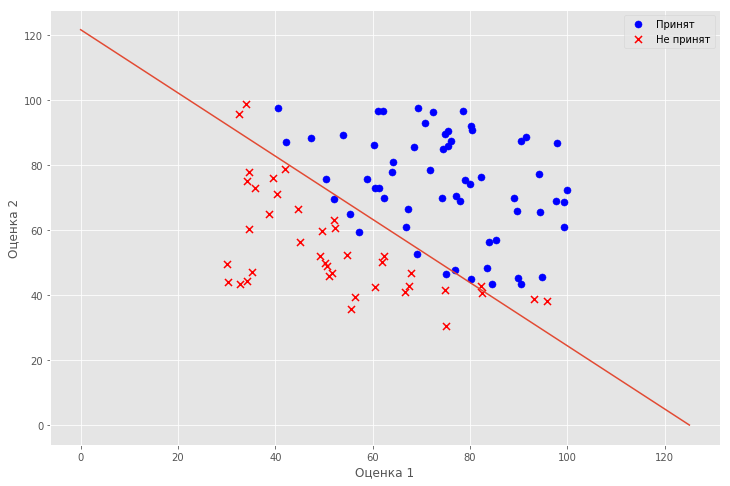

In [5]:
from sklearn.linear_model import LogisticRegression

X = data[['Exam 1', 'Exam 2']]
y = data['Admitted']

model = LogisticRegression(C=1000)
model.fit(X, y)

b = model.intercept_[0]
w1, w2 = model.coef_[0]

print('Коеффициенты', w1, w2)
print('Смещение (bias)', b)

ax.plot([-b/w2, 0], [0, -b/w1])
fig

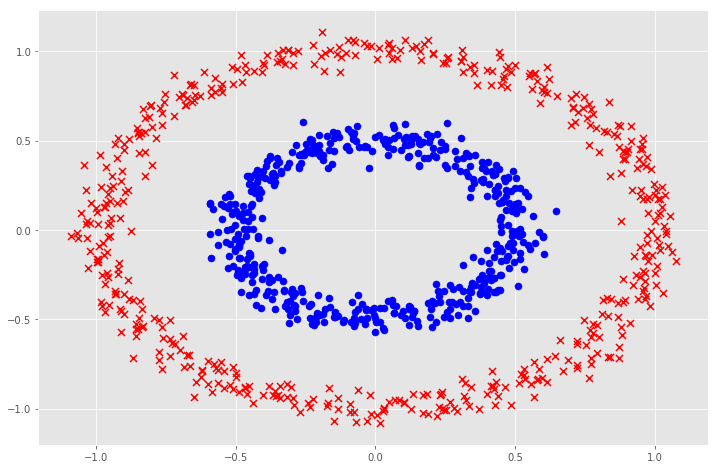

In [40]:
from sklearn import datasets

X, y = datasets.make_circles(n_samples=1000, factor=.5, noise=.05)

positive = X[[y == 1]]
negative = X[[y == 0]]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive[:, 0], positive[:, 1], s=50, c='b', marker='o')
ax.scatter(negative[:, 0], negative[:, 1], s=50, c='r', marker='x')

## Нельзя просто так взять и провести прямую линиию

<img src="img/rings.jpg"></img>

# Извлечение признаков

Львиную часть работы в классических алгоритмах машинного обучения составляет отбор ( feature selection ) и извлечение ( feature engineering ) признаков для модели

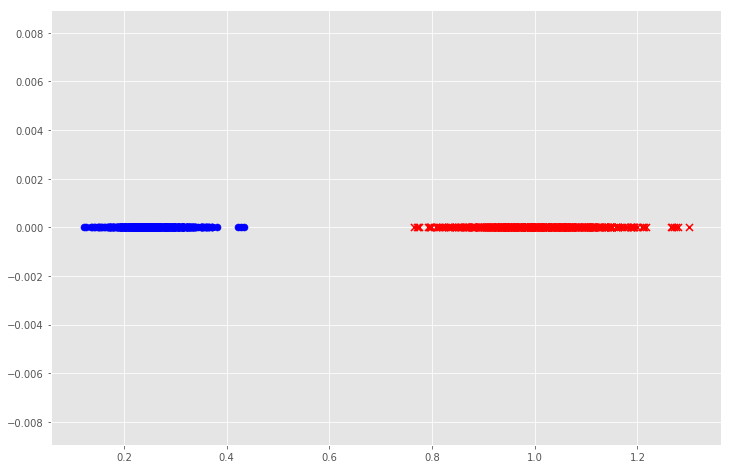

In [50]:
# Введём дополнительный признак r = x1^2 + x2^2

r = np.square(X[:, 0]) + np.square(X[:, 1])

rpositive = r[[y == 1]]
rnegative = r[[y == 0]]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(rpositive, np.zeros_like(rpositive), s=50, c='b', marker='o')
ax.scatter(rnegative, np.zeros_like(rnegative), s=50, c='r', marker='x')

# Недостатки ручного извлечения признаков

* Cлабо формализуемый процесс
* Трудоёмок
* Решения неоптимальны

# Обучение представлению ( representation learning )

Обозначим произвольную функцию регрессии $h$ с линейным предиктором $η$ и обратной функцией связи $f$:

$$ h_i(x)=f_i(η_i) $$

Возьмём композицию из нескольких обобщённых линейных моделей:

$$ y = h_i \circ \ldots \circ h_1 \circ h_o(x) $$

Получившаяся модель называется искуственной нейронной сетью

# Обязательный слайд про математическую модель нейрона


<img src="img/neuron.gif"></img>

# Обязательный слайд про градиентный спуск

<img src="img/gradient_descend.png"/>